In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

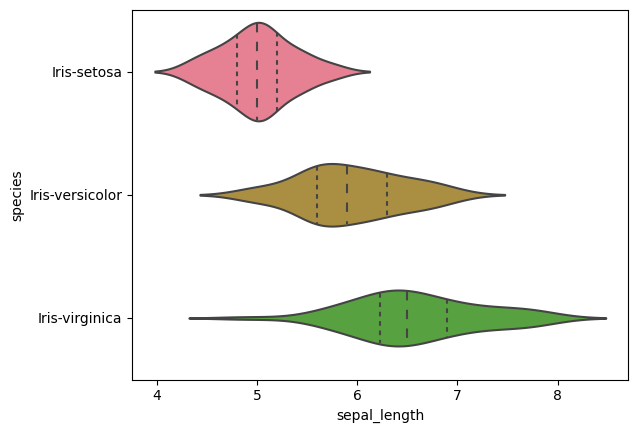

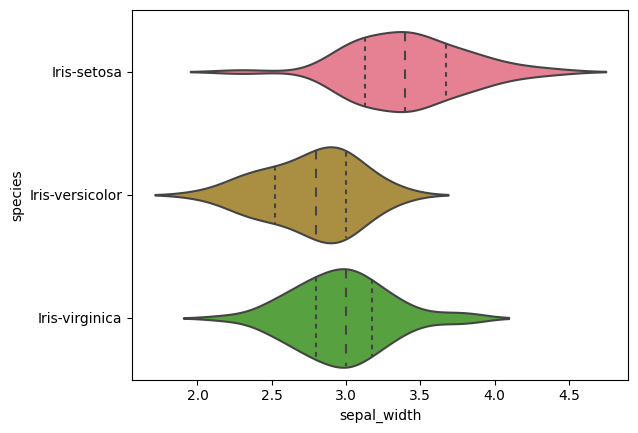

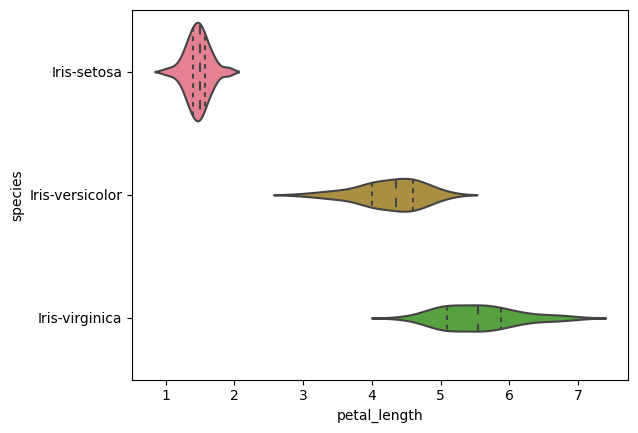

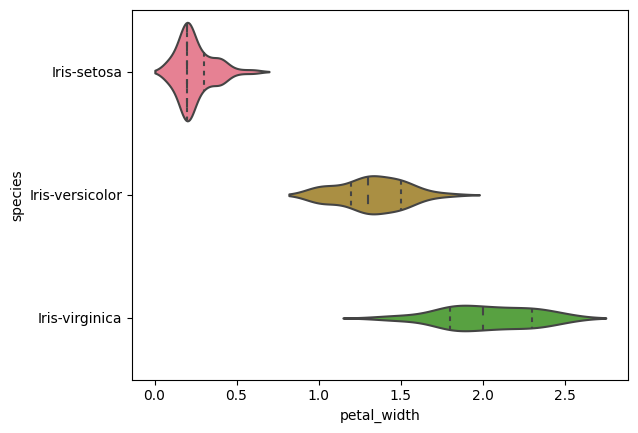

In [6]:
g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

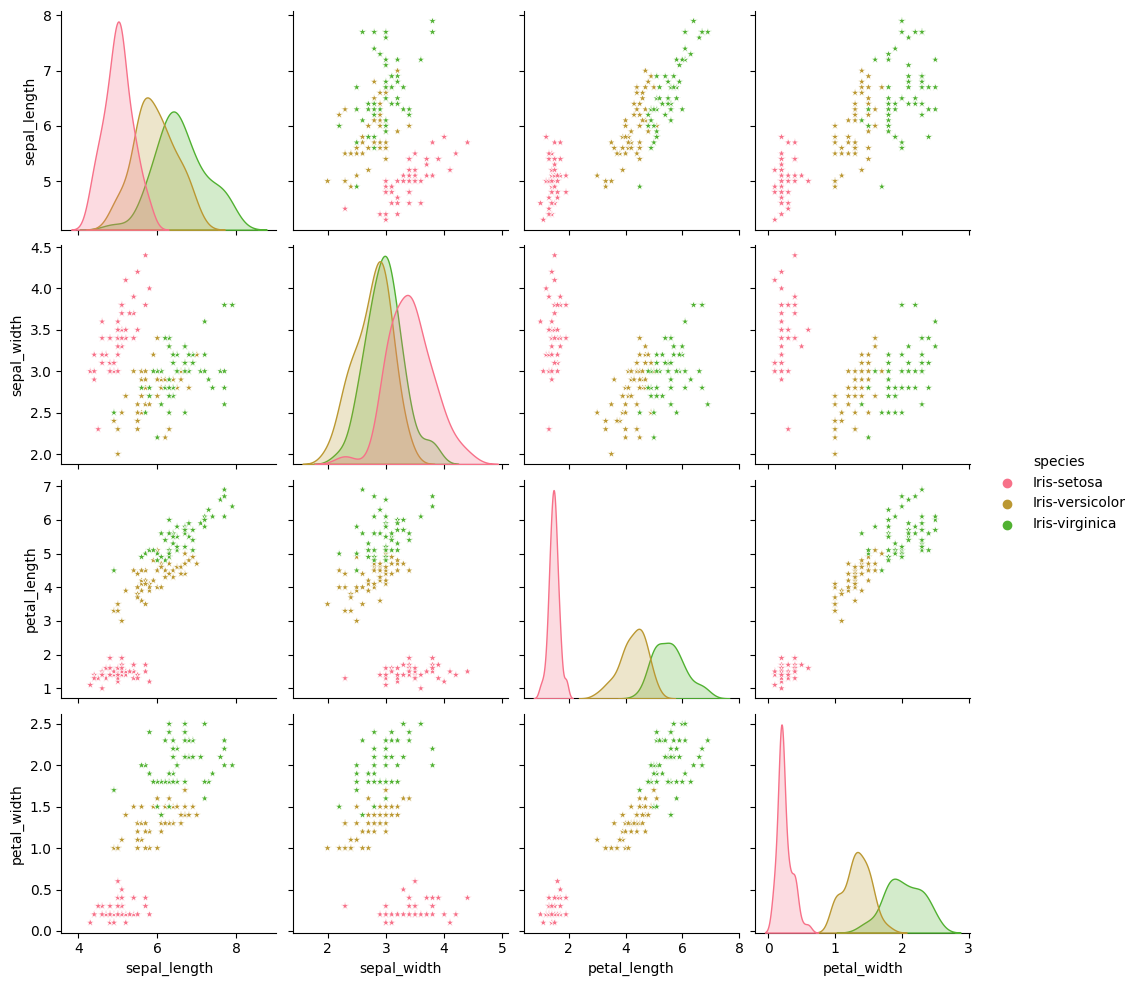

In [7]:
g = sns.pairplot(df, hue='species', markers='*')
plt.show()

In [8]:
df.nunique()


sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [9]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
df.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [12]:
df.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [13]:
df.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [14]:
figg = px.histogram(data_frame=df, x='species', title='total no of Species', color='species')
figg.show()

In [15]:


def Talents(column, dataset):
    column_data = dataset[column]

    if column_data.dtype == 'object':
        top_values = column_data.value_counts().sort_values(ascending=False)[:10]
        top_values.plot(kind="bar", figsize=(10, 6), edgecolor="Yellow")
        plt.xticks(rotation=0)
        plt.title("Iris Data")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        plt.hist(column_data, edgecolor="Yellow")
        plt.title("Iris Data")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

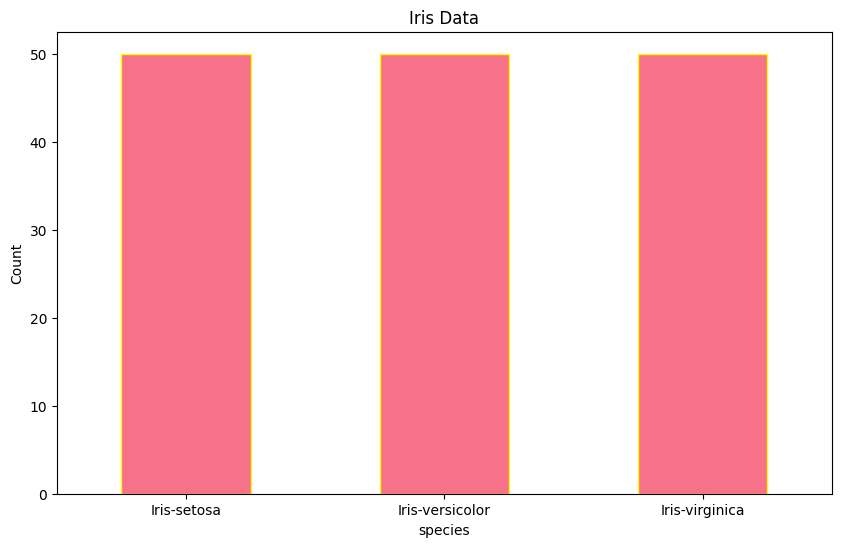

In [16]:
Talents("species",df)

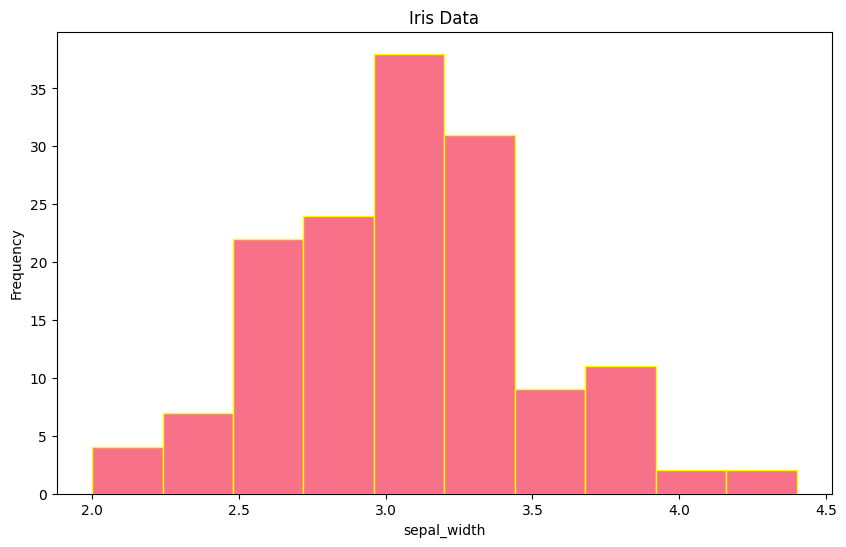

In [17]:
Talents("sepal_width",df)

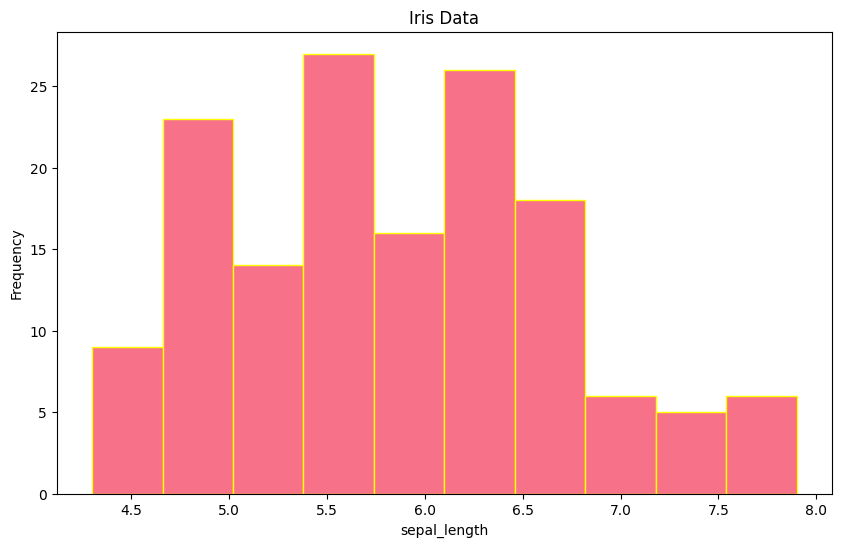

In [18]:
Talents("sepal_length",df)

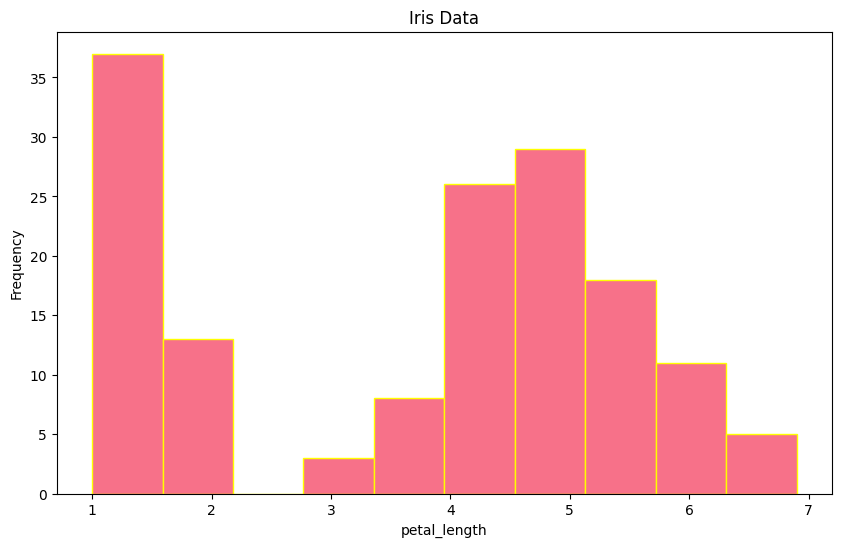

In [19]:
Talents("petal_length",df)

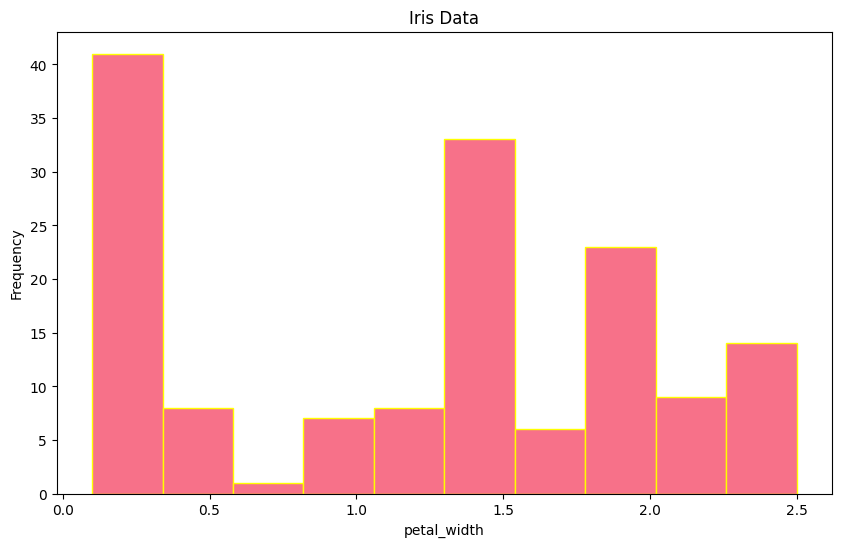

In [20]:
Talents("petal_width",df)

In [21]:
def Histo(column):
    global df
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[column], marker_color='mediumseagreen', marker_line_color='black', marker_line_width=1.5))
    fig.update_layout(title=f'Histogram of {column}', xaxis_title=column, yaxis_title='Frequency', template='plotly_dark')
    fig.show()

In [22]:
Histo('sepal_length')

In [23]:
Histo('petal_length')

In [24]:
Histo('sepal_width')

In [25]:
Histo('petal_width')

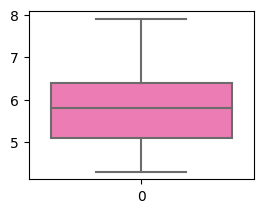

In [26]:
plt.subplot(2,2,1)
sns.boxplot(df['sepal_length'],color='hotpink')
plt.show()

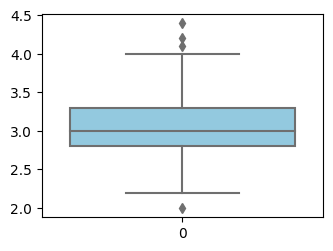

In [27]:
plt.subplot(2,2,2)
sns.boxplot(df['sepal_width'],color='skyblue')

plt.tight_layout()
plt.show()
 

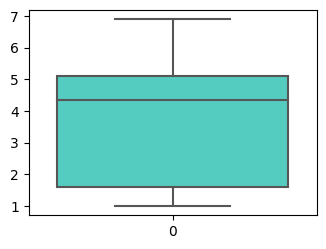

In [28]:


plt.subplot(2,2,3)
sns.boxplot(df['petal_length'],color='turquoise')

plt.tight_layout()
plt.show()
     


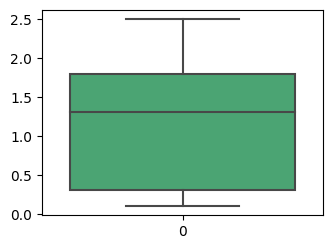

In [29]:
plt.subplot(2,2,4)
sns.boxplot(df['petal_width'],color='mediumseagreen')

plt.tight_layout()
plt.show()


In [30]:
px.scatter_matrix(df, color='species', title='Iris', dimensions=['sepal_length','sepal_width',
                                                                  'petal_length','petal_width'])